In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('drive/My Drive/Deep Learning A-Z/SOM/Credit_Card_Applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

Training the SOM

In [ ]:
!pip install Minisom

  Preparing metadata (setup.py) ... done
  Created wheel for Minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=83832981f8a9c54871c7c0b37c1a21f9dbb6b89a51e733ba1b448615c89b5407
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built Minisom


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10 , y=10 , input_len=15 , sigma=1.0 , learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X , num_iteration=100)

Visualizing the results

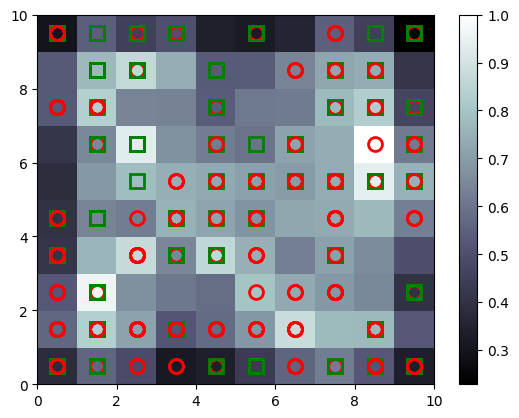

In [ ]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors = ['r','g']

for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()

Finding the Frauds

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,2)] , mappings[(8,6)]),axis=0)
frauds = sc.inverse_transform(frauds)
frauds[:,0]

array([15593345., 15646190., 15672357., 15711299.])

## Part 2 - unsupervised to supervised learning

creating matrix of features

In [ ]:
customers = dataset.iloc[:,1:].values

creating dependent variable

In [ ]:
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i]= 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units=2 ,kernel_initializer='uniform', activation='relu',input_dim=15))

classifier.add(Dense(units=1 ,kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

classifier.fit(customers , is_fraud , batch_size=1 , epochs=2)

y_pred = classifier.predict(customers)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.9942
Epoch 2/2
22/22 [==============================] - 0s 2ms/step


array([[0.02711027],
       [0.03180901],
       [0.0409643 ],
       [0.02405101],
       [0.01908467],
       [0.02473931],
       [0.02139926],
       [0.0302628 ],
       [0.02711932],
       [0.03227032],
       [0.03713822],
       [0.04242372],
       [0.02528688],
       [0.03237896],
       [0.04334673],
       [0.02488919],
       [0.04191815],
       [0.02458579],
       [0.02608269],
       [0.03080592],
       [0.03405498],
       [0.03145808],
       [0.02527178],
       [0.02285653],
       [0.02436021],
       [0.02984516],
       [0.02785639],
       [0.03454249],
       [0.03204979],
       [0.02295045],
       [0.03251907],
       [0.04029758],
       [0.04264399],
       [0.02722479],
       [0.05988145],
       [0.02566865],
       [0.08450249],
       [0.03403755],
       [0.03684561],
       [0.08831197],
       [0.02458575],
       [0.03056728],
       [0.02567847],
       [0.02967385],
       [0.02768358],
       [0.02990722],
       [0.03409554],
       [0.024